Part 1: Advanced Data Visualization

Problem 1

In [52]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [54]:
import pandas as pd
import numpy as np
import os

# Choose your file loading method based on the environment
try:
    from google.colab import files
    IN_COLAB = True  # Flag to indicate we're in Colab
except ImportError:
    IN_COLAB = False # Flag to indicate we're not in Colab

# File loading logic
if IN_COLAB:
    uploaded = files.upload() # Returns a dictionary of uploaded files
    file_name = list(uploaded.keys())[0] # Get the filename
    df2 = pd.read_excel(file_name) 
elif os.path.exists("activity.xlsx"):  # Check if file exists locally
    df2 = pd.read_excel("activity.xlsx")
else:
    raise FileNotFoundError("activity.xlsx not found. Please upload or place it in the same directory as this script.")

df2.head()

# ... rest of your code ...

year  Value                             Type
0  1960   88.1                       Generation
1  1960    NaN                      Composting*
2  1960    5.6                        Recycling
3  1960    0.0  Combustion with energy recovery
4  1960   82.5   Landfilling and other disposal

TODO1:

In [48]:
plastic_df = pd.read_excel("activity.xlsx")
plastic_df.sort_values(by=["year"], inplace=True)
print(plastic_df.columns)


Index(['year', 'Value', 'Type'], dtype='object')


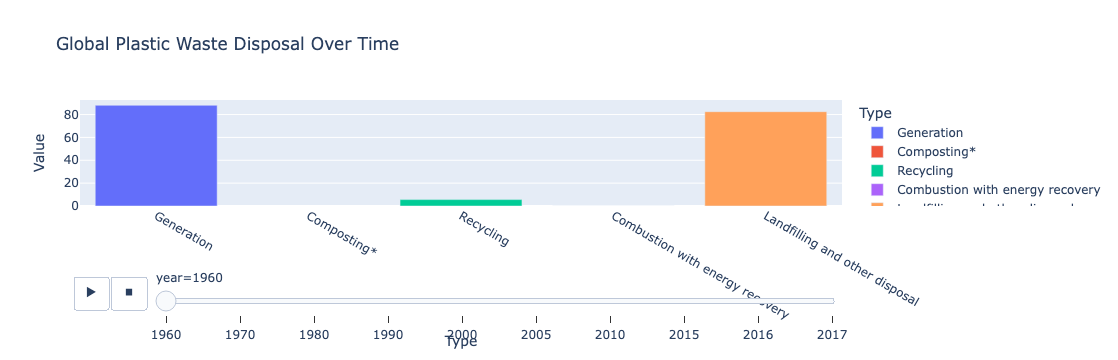

In [50]:
fig = px.bar(plastic_df, x="Type", y="Value", animation_frame="year", color="Type", title="Global Plastic Waste Disposal Over Time")
fig.show()


TODO2:

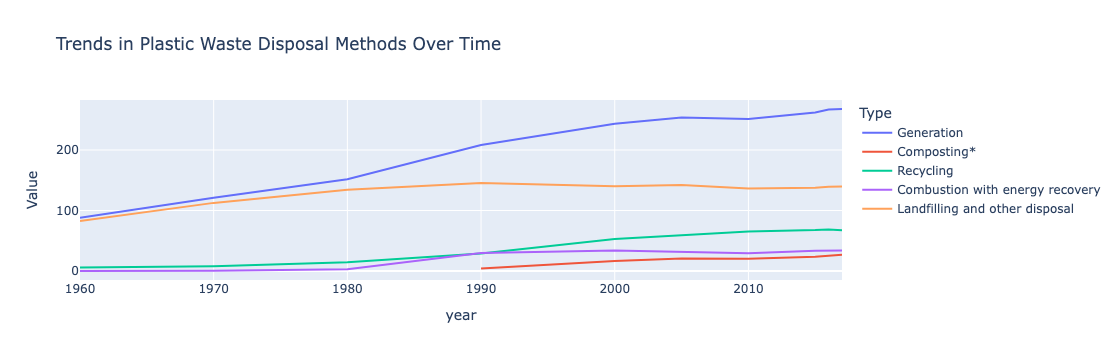

In [61]:
fig2 = px.line(plastic_df, x="year", y="Value", color="Type", title="Trends in Plastic Waste Disposal Methods Over Time")
fig2.show()


Problem 2

In [63]:
#Upgrade the package "plotly" before you start to avoid future syntax error
#You only need to upgrade it once
!pip install plotly --upgrade


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 32.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.6/306.6 kB 35.2 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.22.0
    Uninstalling plotly-5.22.0:
      Successfully uninstalled plotly-5.22.0


In [93]:
import pandas as pd
import numpy as np
import plotly.express as px

fortune_df = pd.read_csv("Global Fortune 500.csv")
fortune_df.head()

Rank              Company Name Country Number of Employees Previous Rank  \
0     1                   Walmart     USA           2,300,000             1   
1     2                State Grid   China             926,067             2   
2     3             Sinopec Group   China             713,288             4   
3     4  China National Petroleum   China           1,512,048             3   
4     5              Toyota Motor   Japan             364,445             8   

   Revenues($millions) Revenue Change Profits($millions) Profit Change  \
0               485873          0.80%              13643        -7.20%   
1               315199         -4.40%             9571.3        -6.20%   
2               267518         -9.10%             1257.9       -65.00%   
3               262573        -12.30%             1867.5       -73.70%   
4               254694          7.70%            16899.3       -12.30%   

   Assets($millions)  Unnamed: 10  Unnamed: 11  
0             198825          NaN          NaN  
1             489838          NaN          NaN  
2             310726          NaN          NaN  
3             585619          NaN          NaN  
4             437575          NaN          NaN

TODO1:

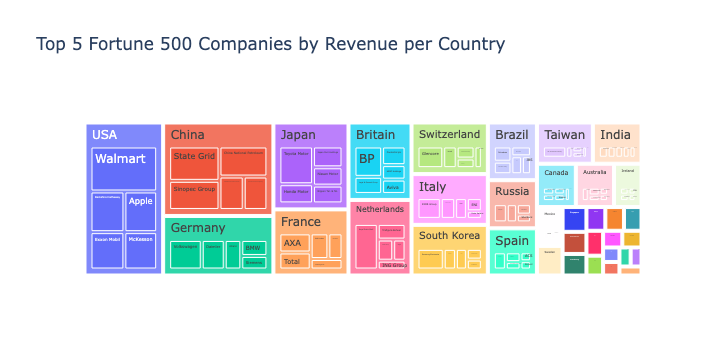

In [95]:
fortune_df.sort_values(by="Revenues($millions)", ascending=False, inplace=True)
top_companies = fortune_df.groupby("Country").head(5)
fig = px.treemap(top_companies, 
                 path=["Country", "Company Name"], 
                 values="Revenues($millions)", 
                 title="Top 5 Fortune 500 Companies by Revenue per Country")
fig.show()



Problem 3

In [104]:
import scipy.stats as stats
from sklearn import preprocessing
%matplotlib inline


air_quality_df= pd.read_excel("Air Quality.xlsx") 
air_quality_df.head()

Date      Time  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10  18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10  19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10  20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10  21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10  22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

TODO1:

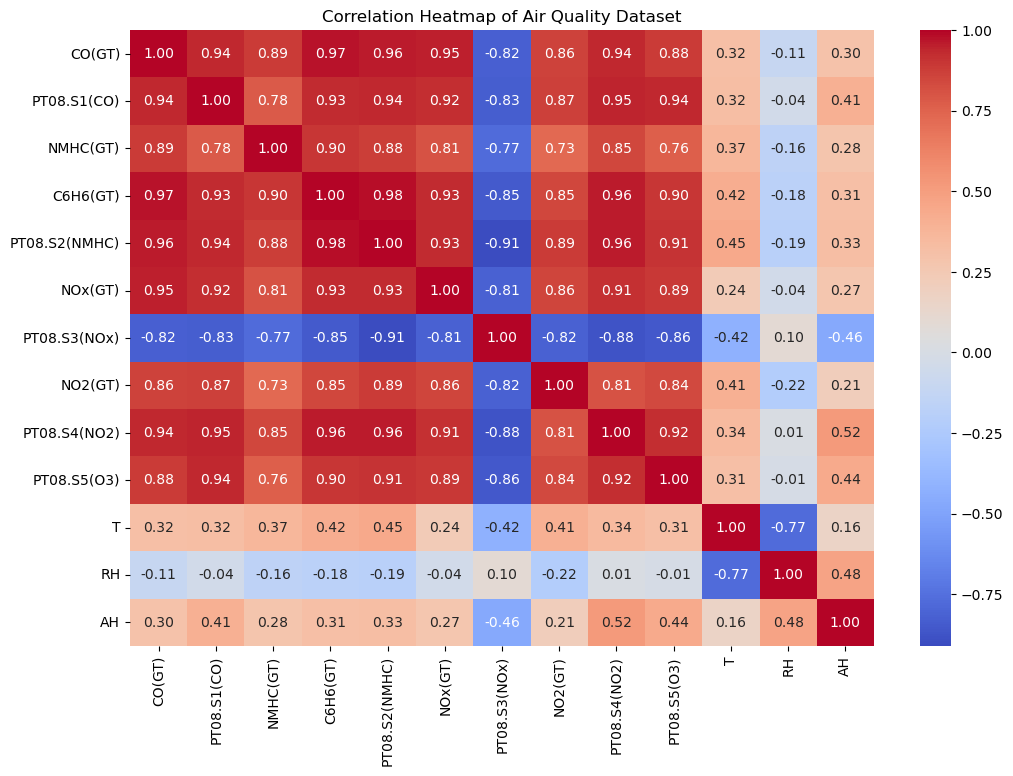

In [109]:
air_quality_df.replace(-200, np.nan, inplace=True)
air_quality_df.dropna(inplace=True)
numeric_df = air_quality_df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Air Quality Dataset")
plt.show()


Part 2: Dimension Reduction

Problem 4

In [115]:
#Import the built-in dataset (Wine recognition) for this problem
from sklearn.decomposition import PCA
from sklearn.datasets import load_wine
np.set_printoptions(suppress=True, precision=8)

wine = load_wine()
df5 = pd.DataFrame(wine['data'], columns=wine['feature_names'])
y = wine['target']
df5.head()


alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                          3.92   1065.0  
1                          3.40   1050.0  
2                          3.17   1185.0  
3                          3.45   1480.0  
4                          2.93    735.0

TODO1:

In [121]:
cov_matrix = np.cov(df5.T)
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
principal_components = np.dot(df5, eigenvectors[:, :2])


TODO2:

In [123]:
pca = PCA(n_components=2)
principal_components_sklearn = pca.fit_transform(df5)
print("Explained Variance:", pca.explained_variance_ratio_)

Explained Variance: [0.99809123 0.00173592]


TODO3:

In [149]:
scaler = StandardScaler()
wine_standardized = scaler.fit_transform(df5)
pca_standardized = PCA(n_components=2)
principal_components_standardized = pca_standardized.fit_transform(wine_standardized)
print("Explained Variance (Standardized):", pca_standardized.explained_variance_ratio_)

Explained Variance (Standardized): [0.36198848 0.1920749 ]


In [ ]:
TODO4:

In [151]:
print("Standardization helps to ensure that features with large ranges do not dominate PCA, making the principal components more meaningful.")

Standardization helps to ensure that features with large ranges do not dominate PCA, making the principal components more meaningful.


TODO5:

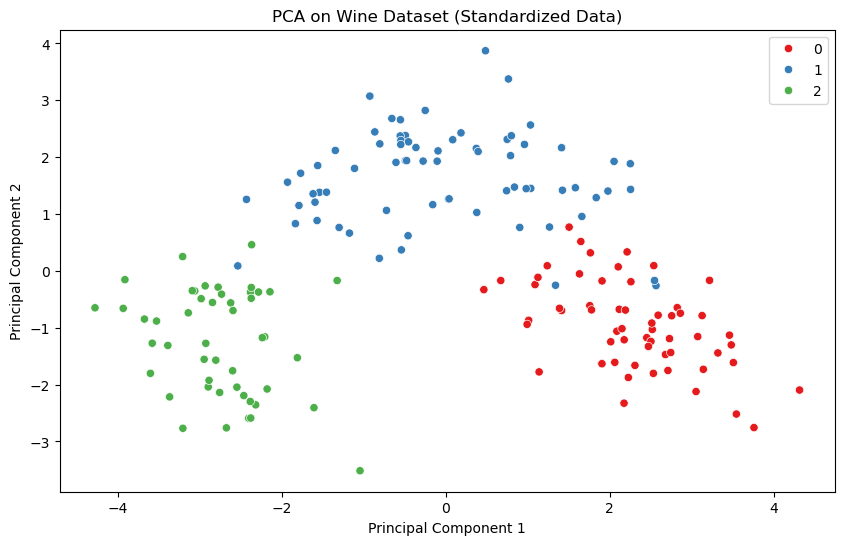

In [129]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components_standardized[:, 0], y=principal_components_standardized[:, 1], hue=y, palette="Set1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine Dataset (Standardized Data)")
plt.show()

OR

TODO1:

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
y = wine.target

cov_matrix = np.cov(X.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

pc1 = X.dot(eigenvectors[:, 0])
pc2 = X.dot(eigenvectors[:, 1])

print("First two principal component scores (raw data):")
print(np.column_stack((pc1, pc2))[:5])
print("\nEigenvalues:")
print(eigenvalues[:2])


First two principal component scores (raw data):
[[-1067.05568749  -108.51625429]
 [-1051.59012786   -81.65940587]
 [-1186.55384112   -80.4868141 ]
 [-1481.73284755   -87.21685258]
 [ -736.92127971  -105.51411816]]

Eigenvalues:
[99201.78951748   172.53526648]


TODO2:

In [143]:
from sklearn.decomposition import PCA

pca_raw = PCA()
pca_raw.fit(X)

explained_variance = pca_raw.explained_variance_
proportion_variance = pca_raw.explained_variance_ratio_
cumulative_proportion = np.cumsum(proportion_variance)

print("Explained variance:")
print(explained_variance)
print("\nProportion variance:")
print(proportion_variance)
print("\nCumulative proportion of variance:")
print(cumulative_proportion)

pc_scores_raw = pca_raw.transform(X)
print("\nFirst two principal component scores (raw data):")
print(pc_scores_raw[:5, :2])


Explained variance:
[99201.78951748   172.53526648     9.4381137      4.99117861
     1.22884523     0.84106387     0.27897352     0.15138127
     0.11209676     0.0717026      0.03757598     0.02107237
     0.0082037 ]

Proportion variance:
[0.99809123 0.00173592 0.00009496 0.00005022 0.00001236 0.00000846
 0.00000281 0.00000152 0.00000113 0.00000072 0.00000038 0.00000021
 0.00000008]

Cumulative proportion of variance:
[0.99809123 0.99982715 0.99992211 0.99997232 0.99998469 0.99999315
 0.99999596 0.99999748 0.99999861 0.99999933 0.99999971 0.99999992
 1.        ]

First two principal component scores (raw data):
[[318.56297929  21.49213073]
 [303.09741966  -5.36471768]
 [438.06113292  -6.53730945]
 [733.24013935   0.19272903]
 [-11.5714285   18.48999461]]


TODO3:

In [145]:

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

pca_std = PCA()
pca_std.fit(X_standardized)

explained_variance_std = pca_std.explained_variance_
proportion_variance_std = pca_std.explained_variance_ratio_
cumulative_proportion_std = np.cumsum(proportion_variance_std)

print("Explained variance (standardized):")
print(explained_variance_std)
print("\nProportion variance (standardized):")
print(proportion_variance_std)
print("\nCumulative proportion of variance (standardized):")
print(cumulative_proportion_std)

pc_scores_std = pca_std.transform(X_standardized)
print("\nFirst two principal component scores (standardized data):")
print(pc_scores_std[:5, :2])


Explained variance (standardized):
[4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]

Proportion variance (standardized):
[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Cumulative proportion of variance (standardized):
[0.36198848 0.55406338 0.66529969 0.73598999 0.80162293 0.85098116
 0.89336795 0.92017544 0.94239698 0.96169717 0.97906553 0.99204785
 1.        ]

First two principal component scores (standardized data):
[[ 3.31675081 -1.44346263]
 [ 2.20946492  0.33339289]
 [ 2.51674015 -1.0311513 ]
 [ 3.75706561 -2.75637191]
 [ 1.00890849 -0.86983082]]


TODO4:

The following justifies the significance of normalizing (standardizing) numerical variables prior to PCA:

* Sensitivity to scale: PCA is affected by the input variables' scale. Even if they are not more significant for the underlying patterns in the data, features with higher variances will dominate the principal components.

* Comparability: All features are brought to the same scale through standardization, which directly compares them. This guarantees that every feature makes an equal contribution to the PCA analysis.

* Interpretability: Because the loadings (eigenvectors) are directly comparable across features, standardized PCA findings are simpler to understand.

* Variation Distribution: Compared to the standardized PCA, we can see that the first few principal components in the raw data PCA account for a significantly higher percentage of the variation.This is probably because the original features had different scales.

* Better representation: Because standardization keeps features with higher scales from taking center stage in the analysis, it frequently results in a more balanced representation of the data in the reduced dimensional space.
 

TODO5:

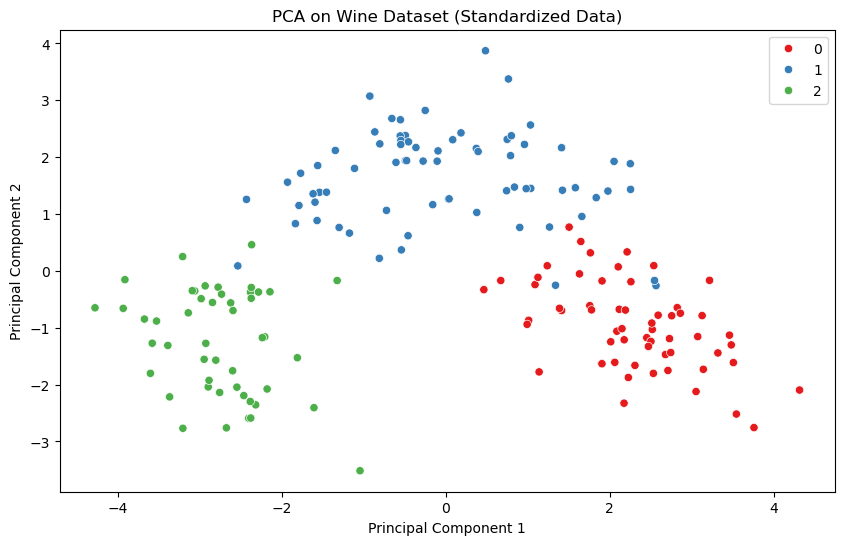

In [139]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=principal_components_standardized[:, 0], y=principal_components_standardized[:, 1], hue=y, palette="Set1")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA on Wine Dataset (Standardized Data)")
plt.show()


Problem 5

In [153]:
from sklearn.manifold import MDS

df6 = pd.read_csv("Life Expectancy.csv") 
df6.head()

Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2014  Developing              59.9              271   
1    Australia  2014   Developed              82.7                6   
2      Austria  2014   Developed              81.4               66   
3   Bangladesh  2014  Developing              71.4              132   
4      Belgium  2014   Developed              89.0               76   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             64     0.01               73.523582         62.0       492  ...   
1              1     9.71            10769.363050         91.0       340  ...   
2              0    12.32             8350.193523         98.0       117  ...   
3             98     0.01               10.446403         97.0       289  ...   
4              0    12.60             7163.348923         98.0        70  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS           GDP  Population  \
0     58               8.18           62        0.1    612.696514    327582.0   
1     92               9.42           92        0.1  62214.691200   2346694.0   
2     98              11.21           98        0.1  51322.639970   8541575.0   
3     97               2.82           97        0.1    184.565430  15945279.0   
4     99               1.59           99        0.1  47439.396840    112957.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.5                 17.5   
1                    0.6                  0.6   
2                    1.8                  2.0   
3                   18.1                 18.6   
4                    1.0                  1.0   

   Income composition of resources  Schooling  
0                            0.476       10.0  
1                            0.936       20.4  
2                            0.892       15.9  
3                            0.570       10.0  
4                            0.890       16.3  

[5 rows x 22 columns]

TODO1:

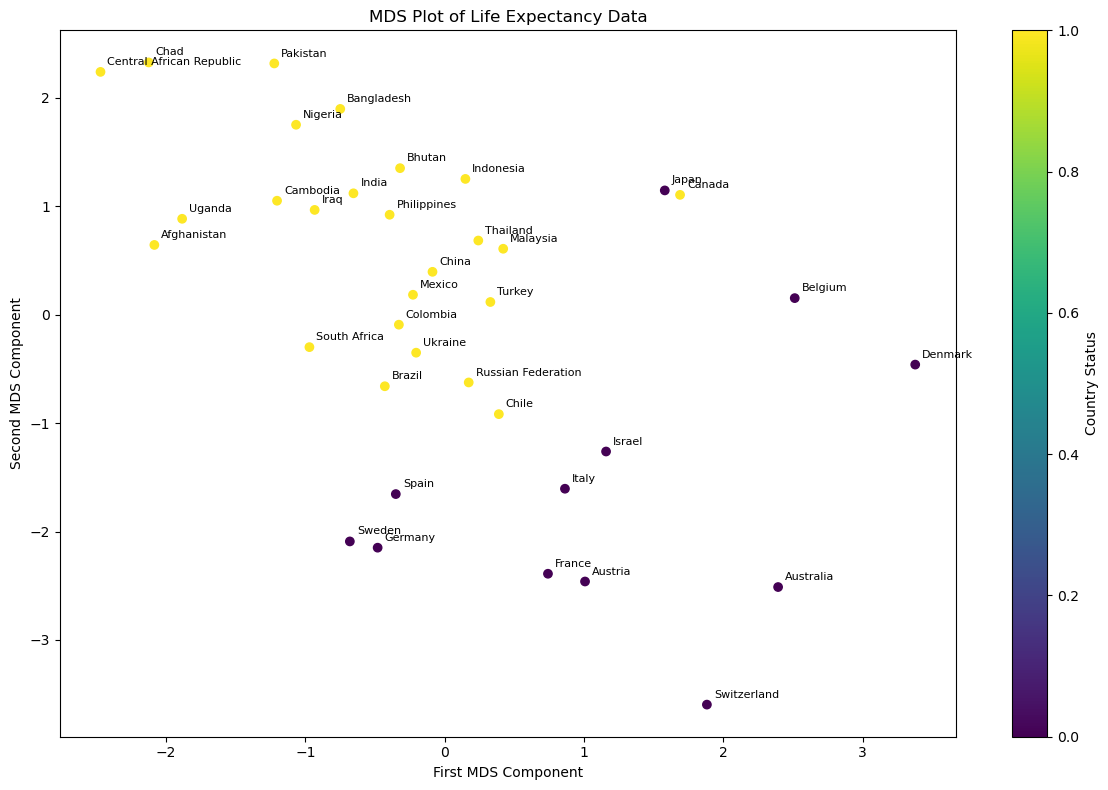

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler


df6 = pd.read_csv("Life Expectancy.csv")

variables = ['GDP', 'Income composition of resources', 'Schooling', 'Total expenditure']
X = df6[variables]

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_standardized)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=df6['Status'].astype('category').cat.codes, cmap='viridis')

for i, country in enumerate(df6['Country']):
    plt.annotate(country, (X_mds[i, 0], X_mds[i, 1]), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.title('MDS Plot of Life Expectancy Data')
plt.xlabel('First MDS Component')
plt.ylabel('Second MDS Component')

plt.colorbar(scatter, label='Country Status')

scatter.legend_elements()[0]

plt.tight_layout()
plt.show()



Problem 6

TODO1:

1. Define Normalization and Standardization. How are they different?
   
Normalization (Min-Max scaling) is the process of rescaling the feature values into a fixed range, typically [0, 1]. It is done by subtracting the minimum value of the feature and dividing by the range (max-min).
 
Standardization (Z-score normalization) transforms data to have a mean of 0 and a standard deviation of 1. It is done by subtracting the mean of the feature and dividing by the standard deviation.

​Key difference:

Normalization scales the data into a fixed range, making it bounded (typically [0, 1]).
Standardization scales the data to have no fixed range, but it centers it around 0 with a standard deviation of 1.

2. In what scenarios is Normalization preferred over Standardization and vice versa?
   
Normalization is preferred:

When the data has a known fixed range (e.g., image data with pixel values from 0 to 255).
When you want all features to contribute equally, especially when working with distance-based models such as k-nearest neighbors (KNN) and neural networks.

Standardization is preferred:

When the data is normally distributed (Gaussian distribution).
When dealing with algorithms that assume normally distributed data (e.g., linear regression, logistic regression, and many machine learning models).
When there are outliers in the data (standardization is less sensitive to them compared to normalization).

3. How do these techniques affect different ML models?
   
Normalization:

Helps distance-based models like k-NN and SVM perform better by treating all features equally, especially when features have different units or ranges.

May not work well with models that assume normally distributed data (e.g., linear regression) since the data is scaled arbitrarily.

Standardization:

Works well with models that rely on assumptions of normally distributed data, such as linear regression, logistic regression, and most tree-based models.

For algorithms like decision trees, random forests, and gradient boosting, standardization is generally not required but still beneficial for consistency and speed of training.

4. What are the potential issues of applying Normalization to a dataset with outliers?
   
Normalization is highly sensitive to outliers because the rescaling is based on the minimum and maximum values. Outliers can skew the data range, which can distort the normalization process and lead to a misrepresentation of the data.

For example, if a dataset has extreme values, normalization will squash most of the data into a narrow range, making it harder to detect patterns in the majority of the data.

TODO2:

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

# Load the dataset
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Display the first few rows
df.head()

# Describe the distribution of the features
df.describe()


MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude  
count  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704  
std       10.386050      2.135952      2.003532  
min        0.692308     32.540000   -124.350000  
25%        2.429741     33.930000   -121.800000  
50%        2.818116     34.260000   -118.490000  
75%        3.282261     37.710000   -118.010000  
max     1243.333333     41.950000   -114.310000

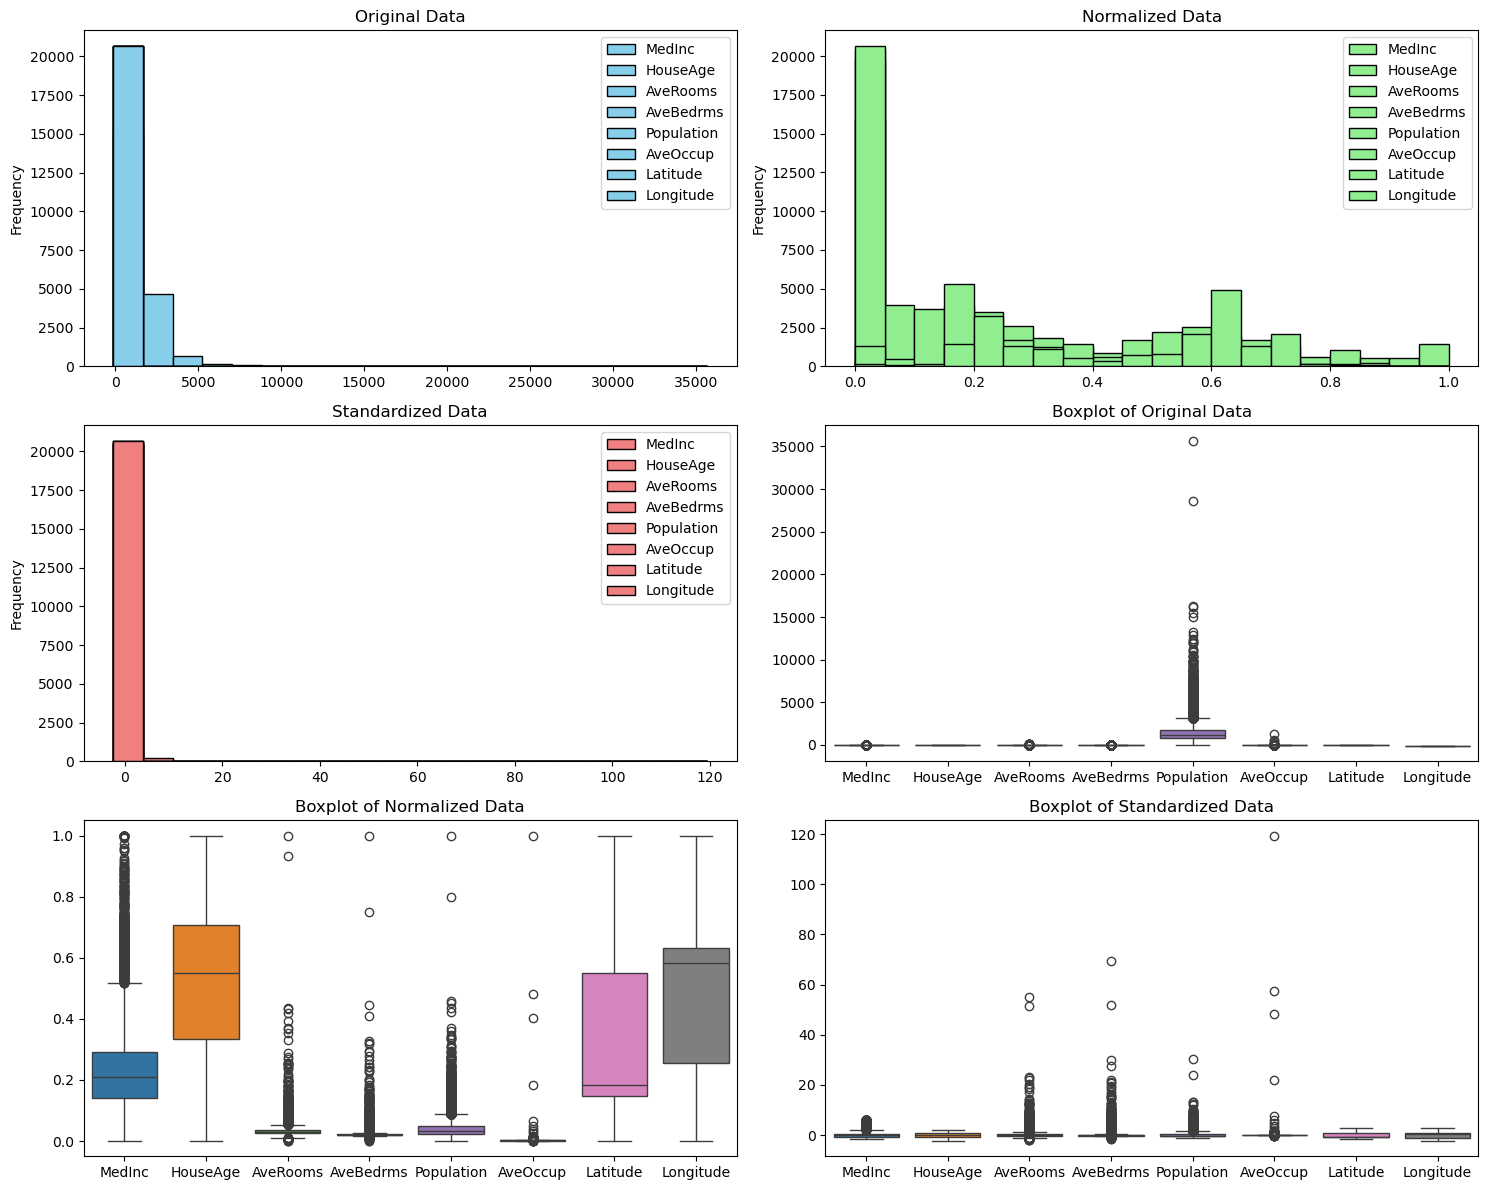

Original Data (Mean, Std, Min, Max):
         MedInc   HouseAge    AveRooms  AveBedrms    Population     AveOccup  \
mean   3.870671  28.639486    5.429000   1.096675   1425.476744     3.070655   
std    1.899822  12.585558    2.474173   0.473911   1132.462122    10.386050   
min    0.499900   1.000000    0.846154   0.333333      3.000000     0.692308   
max   15.000100  52.000000  141.909091  34.066667  35682.000000  1243.333333   

       Latitude   Longitude  
mean  35.631861 -119.569704  
std    2.135952    2.003532  
min   32.540000 -124.350000  
max   41.950000 -114.310000  

Normalized Data (Mean, Std, Min, Max):
        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
mean  0.232464  0.541951  0.032488   0.022629    0.039869  0.001914  0.328572   
std   0.131020  0.246776  0.017539   0.014049    0.031740  0.008358  0.226988   
min   0.000000  0.000000  0.000000   0.000000    0.000000  0.000000  0.000000   
max   1.000000  1.000000  1.000000   1.000000   

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load the dataset
dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Apply Min-Max Normalization
scaler_min_max = MinMaxScaler()
df_normalized = scaler_min_max.fit_transform(df)

# Apply Z-score Standardization
scaler_standard = StandardScaler()
df_standardized = scaler_standard.fit_transform(df)

# Convert the transformed data back to DataFrame for visualization
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)
df_standardized = pd.DataFrame(df_standardized, columns=df.columns)

# Set up the plot grid (3 rows x 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(15, 12))

# Plot Histograms explicitly using axes
df.plot.hist(bins=20, ax=axes[0, 0], color='skyblue', edgecolor='black')
axes[0, 0].set_title("Original Data")
df_normalized.plot.hist(bins=20, ax=axes[0, 1], color='lightgreen', edgecolor='black')
axes[0, 1].set_title("Normalized Data")
df_standardized.plot.hist(bins=20, ax=axes[1, 0], color='lightcoral', edgecolor='black')
axes[1, 0].set_title("Standardized Data")

# Boxplots explicitly using axes
sns.boxplot(data=df, ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of Original Data")
sns.boxplot(data=df_normalized, ax=axes[2, 0])
axes[2, 0].set_title("Boxplot of Normalized Data")
sns.boxplot(data=df_standardized, ax=axes[2, 1])
axes[2, 1].set_title("Boxplot of Standardized Data")

# Adjust layout
plt.tight_layout()
plt.show()

# Compare mean, standard deviation, and range
print("Original Data (Mean, Std, Min, Max):")
print(df.describe().loc[['mean', 'std', 'min', 'max']])

print("\nNormalized Data (Mean, Std, Min, Max):")
print(df_normalized.describe().loc[['mean', 'std', 'min', 'max']])

print("\nStandardized Data (Mean, Std, Min, Max):")
print(df_standardized.describe().loc[['mean', 'std', 'min', 'max']])


OR

<Figure size 1000x600 with 0 Axes>

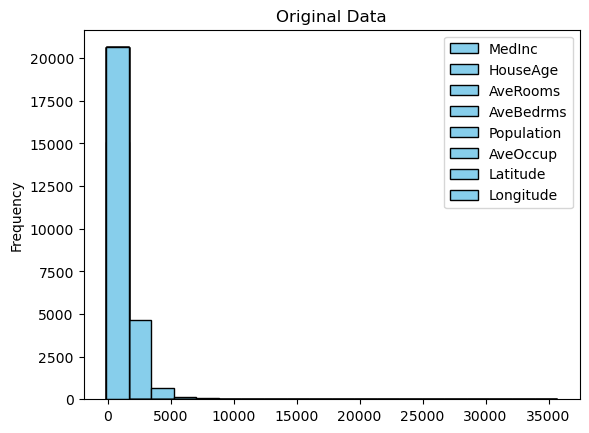

<Figure size 1000x600 with 0 Axes>

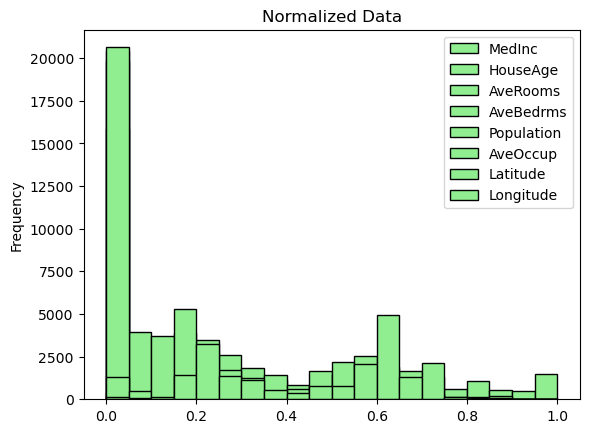

<Figure size 1000x600 with 0 Axes>

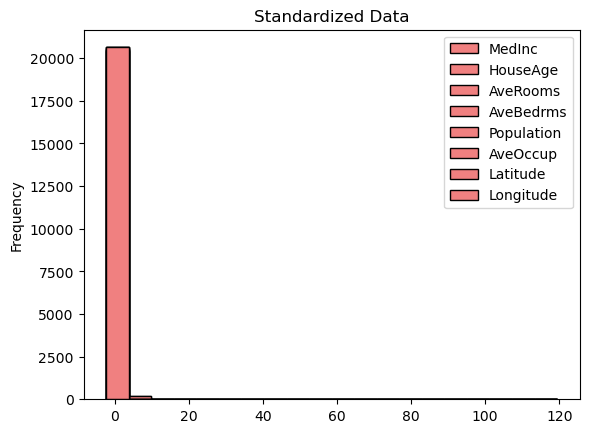

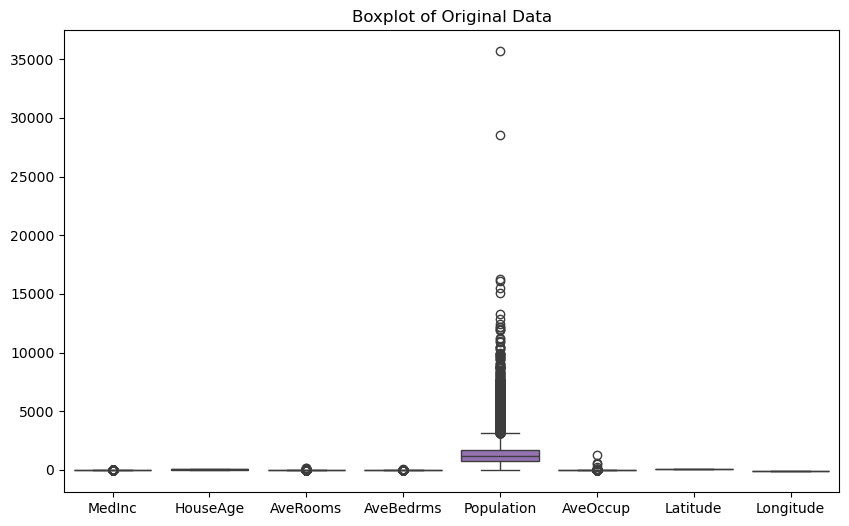

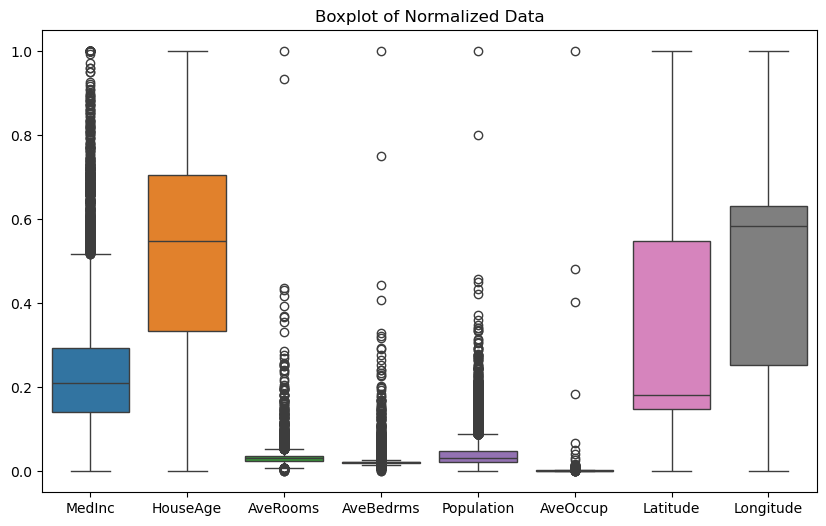

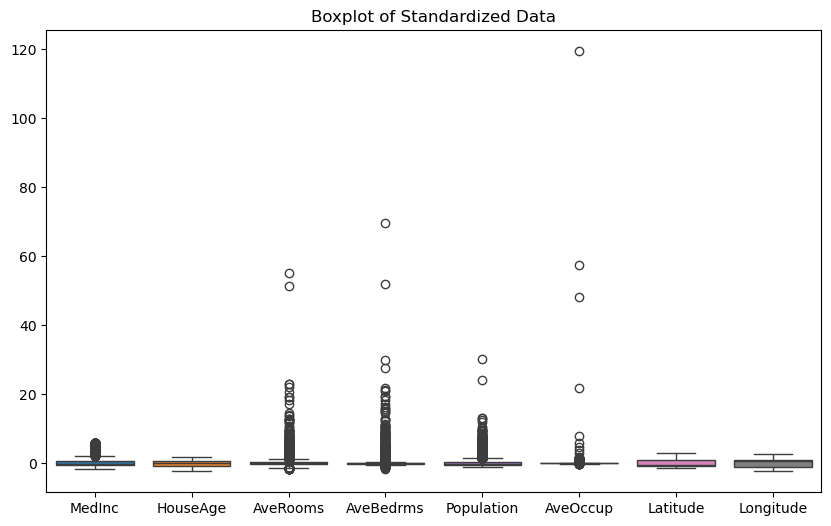

In [187]:
# Create each plot in separate figures
plt.figure(figsize=(10, 6))
df.plot.hist(bins=20, color='skyblue', edgecolor='black')
plt.title("Original Data")
plt.show()

plt.figure(figsize=(10, 6))
df_normalized.plot.hist(bins=20, color='lightgreen', edgecolor='black')
plt.title("Normalized Data")
plt.show()

plt.figure(figsize=(10, 6))
df_standardized.plot.hist(bins=20, color='lightcoral', edgecolor='black')
plt.title("Standardized Data")
plt.show()

# Similarly for boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.title("Boxplot of Original Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_normalized)
plt.title("Boxplot of Normalized Data")
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_standardized)
plt.title("Boxplot of Standardized Data")
plt.show()
